# Data Science Job Market in India. 

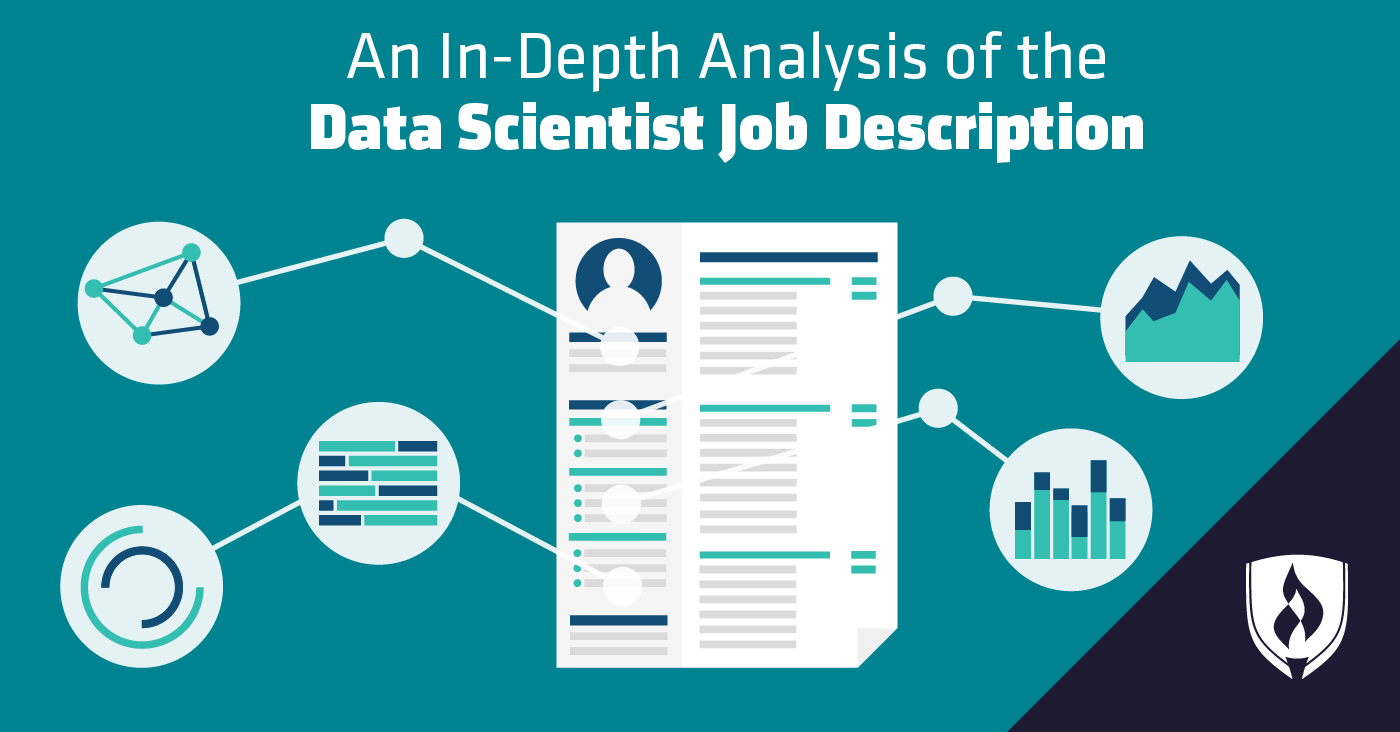

Let's begin with importing the library that will be used along this notebook.

In [22]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

from operator import itemgetter
# regular expression & itertools library
import re
from itertools import chain

Load the dataset and see what we get.

In [2]:
ds = pd.read_csv("Datajobs.csv",index_col='Unnamed: 0')

# show dataset
display(ds.head())

,roles,companies,locations,experience,skills
0,Data Scientist/ Academic Counselor,GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED,"Chennai, Bengaluru",2-7 Yrs,Data Science\nArtificial Intelligence\ntrainin...
1,Data Scientist,Shell India Markets Private Limited,Chennai,5-7 Yrs,Data Science\nMultivariate Analysis\nFactor An...
2,Senior Data Scientist,Decision Point,Gurgaon,3-5 Yrs,Azure\ntimeseries forecasting\nMachine Learnin...
3,Data Scientist - Machine Learning & Statistica...,Talent Stock Solutions,Delhi,2-5 Yrs,Data Science\nR\nC\nData Scientist\nStatistica...
4,Data Scientist,Zen3Tech (A Tech Mahindra Company),Hyderabad,3-8 Yrs,R\nA/B Testing\nData Manipulation\nMachine Lea...


There are 1282 entries and 5 categorical variables.

In [3]:
print("Data Dimensions:", ds.shape,"\n")
print(ds.dtypes)

Data Dimensions: (1282, 5) 

roles         object
companies     object
locations     object
experience    object
skills        object
dtype: object


 Let's see what kind of entries that missing out from the dataset.

In [4]:
print(ds.isnull().sum())
null_index = ds[ds.skills.isnull()].index
ds.loc[null_index]

roles         0
companies     0
locations     0
experience    0
skills        3
dtype: int64


,roles,companies,locations,experience,skills
653,Senior Manager I - Data Scientist,Walmart,Other,0-5 Yrs,NaN
658,Data Scientist,Walmart,Other,0-5 Yrs,NaN
674,Senior Manager I - Data Scientist,Walmart,Other,0-5 Yrs,NaN


There are 3 missing values in **skills** variable. Since these entries has no specific locations, we can remove it from the dataset.

In [5]:
ds.dropna(subset=["skills"],inplace=True)

## On Locations Variable

Let's see the unique values from the locations variable.

In [6]:
print(np.sort(ds.locations.unique()))

['Ahmedabad' 'Ahmedabad(Ashram Road)'
 'Ahmedabad(Navrangpura), Anand, Mehsana' 'Ahmedabad, Bengaluru'
 'Ahmedabad, ahmedabad' 'Andheri' 'Anywherein India' 'Bengaluru'
 'Bengaluru(6th block Koramangala)' 'Bengaluru(BTM Layout)'
 'Bengaluru(Indra Nagar)' 'Bengaluru(Koramangala)' 'Bengaluru(Nagavara)'
 'Bengaluru(Whitefield)' 'Bengaluru, Bengaluru / Bangalore'
 'Bengaluru, Gurgaon' 'Bengaluru, Gurgaon, Noida' 'Bengaluru, Hyderabad'
 'Bengaluru, India' 'Bengaluru, KA' 'Bengaluru, Karnataka'
 'Bengaluru, Kochi' 'Bengaluru, Noida' 'Bhubaneshwar' 'Chandigarh'
 'Chennai' 'Chennai(Anna Nagar East)' 'Chennai(Navalur)'
 'Chennai(Nungambakkam)' 'Chennai(Okkiyam Thuraipakkam)'
 'Chennai(Taramani)' 'Chennai, Bengaluru' 'Chennai, Bengaluru, Hyderabad'
 'Chennai, Bengaluru, Kochi' 'Chennai, Bengaluru, Remote'
 'Chennai, Delhi, Mumbai, Bengaluru, Hyderabad' 'Chennai, India'
 'Chennai, Kochi, Bengaluru' 'Chennai, Pune'
 'Chennai, Pune, Bareilly, Bengaluru, Ankleshwar, Anantapur, Bellary, Hyderabad, Ang

As we can see there are a lot inconsistency of the location name from the locations entries. We can fix it begin with:
* Create new row(s) from locations name that include coma (,) in it.
* Fix the locations name with bracket.
* Fix the locations name that sounds synonim.
* Remove the duplicated rows.

In [7]:
# some functions

# return list from series of comma-separated strings
def chainer(s, pattern):
    return list(chain.from_iterable(s.str.split(pattern)))

# word changer
def word_changer(name,target,new_name):
    if target in name.split(" "):
        name = new_name
    elif target == name:
        name = new_name
    return name

# calculate lengths of splits
lens = ds['locations'].str.split(",").map(len)

# create new dataframe, repeating or chaining as appropriate
ds = pd.DataFrame({
    'roles': np.repeat(ds['roles'], lens),
    'companies': np.repeat(ds['companies'], lens),
    'locations': chainer(ds['locations'], ","),
    'experience': np.repeat(ds['experience'], lens),
    'skills': np.repeat(ds['skills'], lens)
})

# capitalize locations name
ds.locations = ds.locations.apply(lambda x: x.strip().upper())
display(ds.head())

# fix locations name with the bracket
for i,location in ds.locations.items():
    if location.find("(") >= 0:
        pos = location.find("(")
        ds.locations.loc[i] = location[:pos].strip()

# fix the locations name that sounds synonim
target = ["BANGALORE","BENGALURU","INDIA","BHUBANESWAR","DELHI","MUMBAI","NAGPUR","OTHER NATIONAL LOCATIONS"]
new = ["BENGALURU","BENGALURU","INDIA","BHUBANESHWAR","DELHI","MUMBAI","NAGPUR","INDIA"]

for i in range(len(target)):
    ds.locations = ds.locations.apply(lambda x: word_changer(x,target[i],new[i]))

# country list    
country = ["JAPAN","DENMARK","GERMANY","MALAYSIA""POLAND","SOUTH KOREA","SPAIN","UNITED KINGDOM","UNITED STATES","SINGAPORE"]    
    
# fix other locations name
target = ["INTERNATIONAL","ANY","NOT SPECIFIED","OVERSEAS","REMOTE"]
other = "OTHER"

for i in range(len(target)):
    ds.locations = ds.locations.apply(lambda x: word_changer(x,target[i],other))
    
# remove duplicated rows from dataset
print(f"{ds.duplicated().sum()} duplicated rows successfully removed out.","\n")
ds.drop_duplicates(inplace=True)
ds.reset_index(drop=True, inplace=True)
print("Rows Remain:", ds.shape[0])

,roles,companies,locations,experience,skills
0,Data Scientist/ Academic Counselor,GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED,CHENNAI,2-7 Yrs,Data Science\nArtificial Intelligence\ntrainin...
0,Data Scientist/ Academic Counselor,GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED,BENGALURU,2-7 Yrs,Data Science\nArtificial Intelligence\ntrainin...
1,Data Scientist,Shell India Markets Private Limited,CHENNAI,5-7 Yrs,Data Science\nMultivariate Analysis\nFactor An...
2,Senior Data Scientist,Decision Point,GURGAON,3-5 Yrs,Azure\ntimeseries forecasting\nMachine Learnin...
3,Data Scientist - Machine Learning & Statistica...,Talent Stock Solutions,DELHI,2-5 Yrs,Data Science\nR\nC\nData Scientist\nStatistica...


355 duplicated rows successfully removed out. 

Rows Remain: 1218


In [8]:
print(np.sort(ds.locations.unique()))

['AHMEDABAD' 'ANANTAPUR' 'ANDHERI' 'ANGUL' 'ANKLESHWAR' 'BAREILLY'
 'BELLARY' 'BENGALURU' 'BHUBANESHWAR' 'CHANDIGARH' 'CHENNAI' 'COIMBATORE'
 'DELHI' 'DENMARK' 'GERMANY' 'GUNTUR' 'GURGAON' 'GURUGRAM' 'HARYANA'
 'HENRY' 'HOSUR' 'HYDERABAD' 'INDIA' 'INDORE' 'JAIPUR' 'JAMSHEDPUR'
 'JAPAN' 'KA' 'KARNATAKA' 'KOCHI' 'KOLKATA' 'KOTA' 'KOZHIKODE' 'LUCKNOW'
 'MAHARASHTRA' 'MALAYSIA' 'MANGALORE' 'MEERUT' 'MOHALI' 'MUMBAI' 'MYSORE'
 'NAGPUR' 'NOIDA' 'OTHER' 'PANCHKULA' 'PATNA' 'POLAND' 'PUNE' 'RAJASTHAN'
 'SACHIN' 'SINGAPORE' 'SOUTH KOREA' 'THANE' 'THRISSUR' 'TRIVANDRUM'
 'UNITED KINGDOM' 'UNITED STATES' 'UTTAR PRADESH' 'VADODARA'
 'VISAKHAPATNAM']


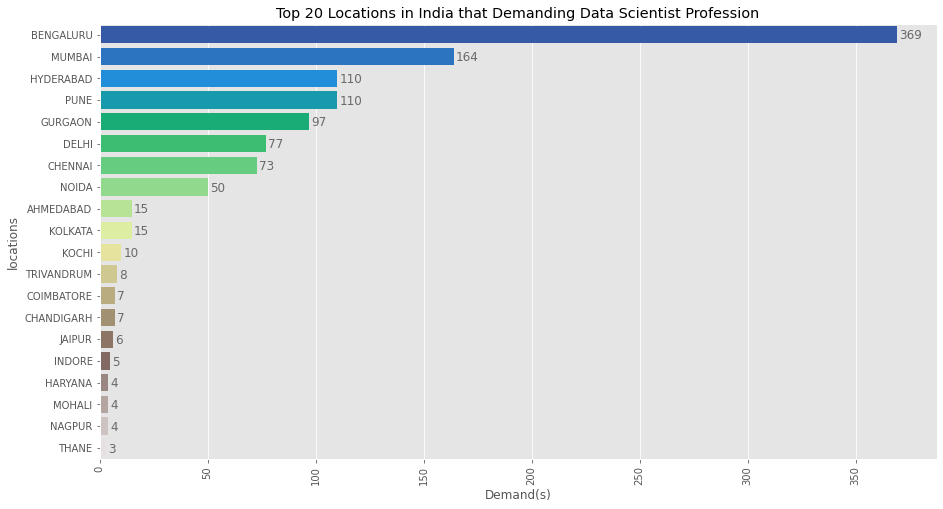

In [9]:
ds_india = ds[~ds.locations.isin(np.append(country,["OTHER","INDIA"]))]

plt.figure(figsize=(15,8))
chart = sns.countplot(data=ds_india, y="locations", order=ds_india.locations.value_counts().index[:20], palette="terrain")

for i in chart.patches:
    chart.text(i.get_width()+1, i.get_y()+.6, str(i.get_width()), fontsize=12, color='dimgrey')

plt.title("Top 20 Locations in India that Demanding Data Scientist Profession")    
plt.xticks(rotation=90)
plt.xlabel("Demand(s)")
plt.show()

Bengaluru, Mumbai, Pune, Hyderabad, Gurgaon, Delhi, Chennai, and Noida are the top locations in India that demanding profession Data Scientist.

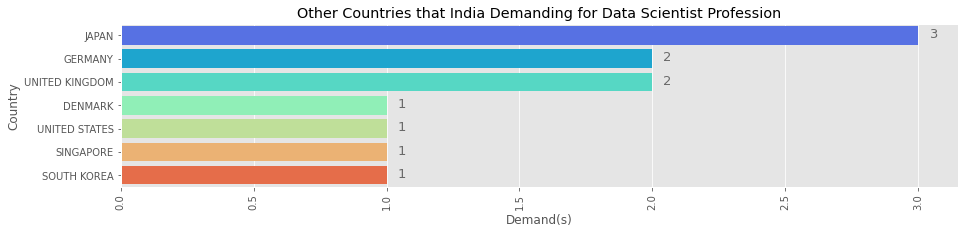

In [10]:
international = ds[ds.locations.isin(country)]

plt.figure(figsize=(15,3))
chart = sns.countplot(data=international, y="locations", order=international.locations.value_counts().index, palette="rainbow")

for i in chart.patches:
    chart.text(i.get_width()+.04, i.get_y()+.5, str(i.get_width()), fontsize=13, color='dimgrey')

plt.title("Other Countries that India Demanding for Data Scientist Profession")    
plt.xticks(rotation=90)
plt.ylabel("Country"); plt.xlabel("Demand(s)");
plt.show()

Seems like India demanding Data Scientist Profession from other countries too, like: Japan, United Kingdom, United States, Germany, Denmark, Shouth Korea, and Singapore.
___

## On Roles Variable

First, we need to change some word Sr to Senior, Jr to Junior, Mgr to Manager and so on. After that we remove unecessary character from roles, and look for word used the most before word "Data Scientist" and use that as the kind profession for Data Scientist

In [11]:
# capitalize all roles name
ds.roles = ds.roles.apply(lambda x: x.upper())

# unnecessary char removal
tb = ["/",",","-","–","_","(",")",".","|","[","]","+"]

for i in range(len(tb)):
    ds.roles = ds.roles.apply(lambda x: x.replace(tb[i]," "))
    
# change some word
target = ["SR","JR","DL","ML","MGR"]
alt = ["SENIOR","JUNIOR","DEEP LEARNING","MACHINE LEARNING","MANAGER"]

for x in range(len(target)):
    for i,role in ds.roles.items():
        if target[x] in role.split(" "):
            ds.roles[i] = ds.roles[i].replace(target[x],alt[x])
    
# change some character
ds.roles = ds.roles.apply(lambda x: x.replace("R&D","RESEARCH AND DEVELOPMENT"))
ds.roles = ds.roles.apply(lambda x: x.replace("&"," AND "))
ds.roles = ds.roles.apply(lambda x: x.replace("@"," AT "))

# profession name check function
def profession_partition(series,target):
    
    # empty var
    df = pd.DataFrame()
    df_index = []
    
    # get target value and its index
    for i,role in series.items():

        if role.find(target) >= 0:
            parts = role.partition(target)

            col1 = parts[0].strip()
            col2 = parts[1]
            col3 = parts[2].strip()

            data = {
                'before':col1,
                'data_scientist':col2,
                'after':col3
            }
            
            # store it into dataframe
            if df.empty:
                df = pd.DataFrame([data])
            else:
                data = pd.DataFrame([data])
                df = pd.concat([df,data])
            
            # get the index
            df_index.append(i)
            
    # reset indexes
    df.index = df_index
    
    return df

# check for word before and after data scientist
dsc = profession_partition(ds.roles,"DATA SCIENTIST")
count_before = dsc.before.value_counts()
count_before[count_before > 5]

                                                    507
SENIOR                                              122
LEAD                                                 39
PRINCIPAL                                            14
OPENING FOR                                          13
JUNIOR                                               11
ASSOCIATE                                             8
MANAGER                                               7
HIRING A PART TIME SUPPORTER FOR DATA ANALYST OR      7
FULL STACK                                            7
ANALYST                                               6
Name: before, dtype: int64

There are 515 blank space or not even word before data scientist, 125 Senior word, 42 Lead word, 13 Junior word, 11 Associate word, 8 Full Stack word, and 7 Manager word. Let's use that words and see what the most demanding position

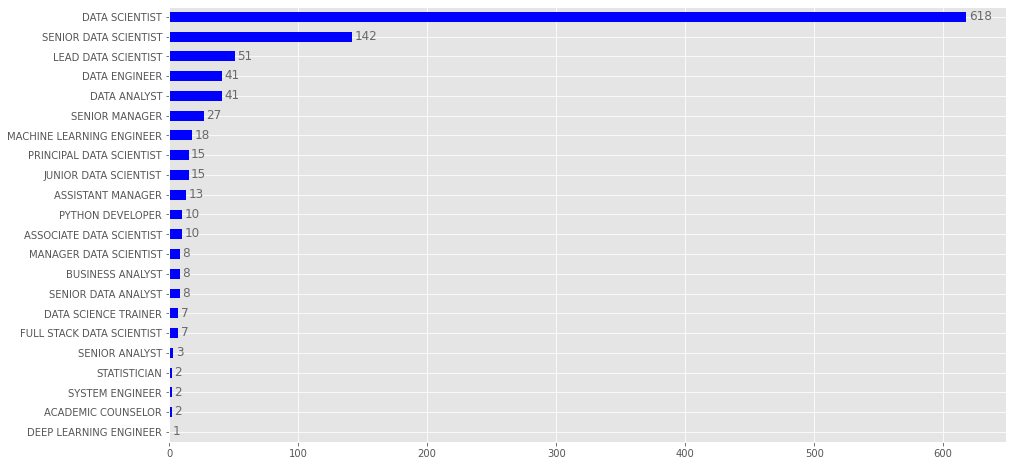

In [12]:
# professions and one terms
position = ["SENIOR MANAGER","SENIOR DATA SCIENTIST","LEAD DATA SCIENTIST","PRINCIPAL DATA SCIENTIST",
            "JUNIOR DATA SCIENTIST","ASSOCIATE DATA SCIENTIST","FULL STACK DATA SCIENTIST","MANAGER DATA SCIENTIST",
            "DATA SCIENTIST","DATA SCIENE ENGINEER","DATA ENGINEER","SENIOR DATA ANALYST","DATA ANALYST",
            "SENIOR ANALYST","MACHINE LEARNING ENGINEER","DEEP LEARNING ENGINEER",
            "DATA SCIENCE TRAINER","BUSINESS ANALYST","PYTHON DEVELOPER","STATISTICIAN","SYSTEM ENGINEER",
            "ACADEMIC COUNSELOR","ASSISTANT MANAGER"]

terms = ["MACHINE LEARNING","DEEP LEARNING","ARTIFICIAL INTELLIGENCE","PREDICTIVE MODELING","STATISTICAL ANALYSIS",
         "BIG DATA","DATA SCIENCE","DATA ENGINEERING","E COMMERCE"]

words = []

for _,role in ds.roles.items():
    regex = re.findall("[A-Z]+",role)
    
    # combine word follow by position words
    for an in position:
        n = len(an.split(" "))
        valid = 0
        for word in an.split(" "):
            if word in regex:
                valid += 1
        if valid == n:
            for word in an.split(" "):
                regex.remove(word)
            regex.append(an)
    
    # combine word follow by terms words
    for an in terms:
        n = len(an.split(" "))
        valid = 0
        for word in an.split(" "):
            if word in regex:
                valid += 1
        if valid == n:
            for word in an.split(" "):
                regex.remove(word)
            regex.append(an)
    
    for r in regex:
        words.append(r)

# convert list to pandas Series
words = pd.Series(words)

# plot words with Data Scientist in roles
ax = words[words.isin(position)].value_counts().plot.barh(figsize=(15,8), color="blue")

# set individual bar lables using above list
for v in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(v.get_width()+2, v.get_y()+0.4, str(v.get_width()), fontsize=12, color='dimgrey')

ax.invert_yaxis()
plt.show()

Data Scientist are the most demanding position for Data Science Job in India. Followed by Senior Data Scientist, Lead Data Scientist, Data Engineer, Data Analyst, Machine Learning Engineer and so on
___

## On Companies Variable

Frist, clean it up, and then see the top companies in India that demanding Data Science profession the most.

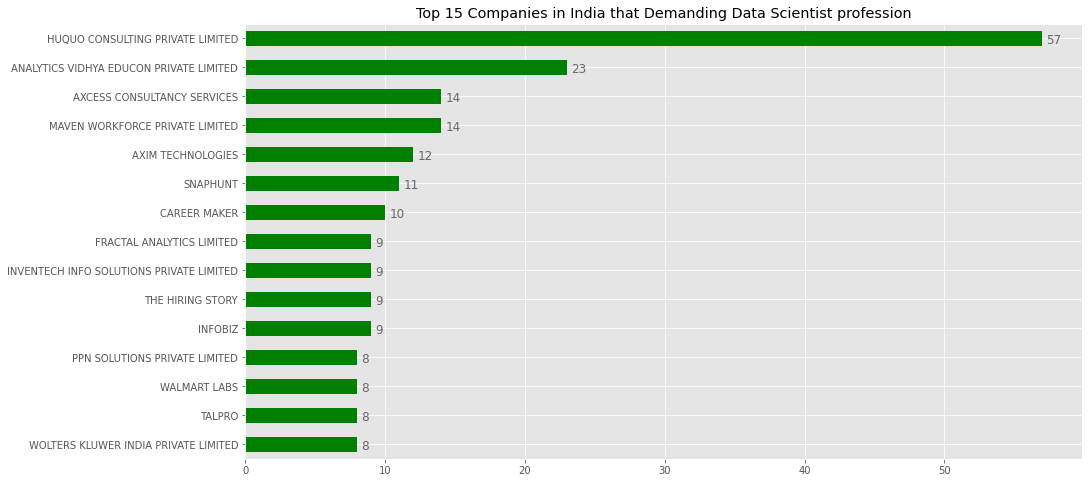

In [13]:
# capitalize all the name of companies variable
ds.companies = ds.companies.apply(lambda x: x.upper())

# replace some words
for i,com in ds.companies.items():
    
    # remove BIGSHYFT HIRING FOR sentence from companies name
    if "FOR" in com.split(" "):
        ds.companies[i] = ds.companies[i].replace("BIGSHYFT HIRING FOR ","").strip()
    
    # replace PVT with PRIVATe
    if "PVT" in com.split(" "):
        ds.companies[i] = ds.companies[i].replace("PVT","PRIVATE").strip()
    if "PVT." in com.split(" "):
        ds.companies[i] = ds.companies[i].replace("PVT.","PRIVATE").strip()
        
    # replace LTD with LIMITED
    if "LTD" in com.split(" "):
        ds.companies[i] = ds.companies[i].replace("LTD","LIMITED").strip()
    if "LTD." in com.split(" "):
        ds.companies[i] = ds.companies[i].replace("LTD.","LIMITED").strip()

# plot words with Data Scientist in roles
ax = ds.companies.value_counts()[:15].plot.barh(figsize=(15,8), color="green")

# set individual bar lables using above list
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.45, str(i.get_width()), fontsize=12, color='dimgrey')

ax.invert_yaxis()
plt.title("Top 15 Companies in India that Demanding Data Scientist profession")
plt.show()

As we can see, Huquo Consulting are the top companies that demanding Data Scientist profession in India. While based on locations, Gurgaon are the highest place where Huquo Consulting looking for Data Scientist profession.

In [14]:
ds[ds.companies == "HUQUO CONSULTING PRIVATE LIMITED"].locations.value_counts()

GURGAON      22
DELHI        13
BENGALURU    12
MUMBAI        5
NOIDA         5
Name: locations, dtype: int64

## On Skills Variable

In [15]:
# capitalize and transform word into one line
ds.skills = ds.skills.apply(lambda x: x.upper())
ds.skills = ds.skills.apply(lambda x: ", ".join(x.split("\n")))

# assign into new dataframe while the index == roles that has word "Data Scientist" in it
df = ds.loc[dsc.index]

# get all skills
words = []
for skills in ds.skills:
    words  = np.append(words,skills.split(", "))
    
words = pd.Series(words)

In [16]:
print(f"There are {len(words.sort_values().unique())} unique skills that required for being an Data Scientist in India")

There are 1076 unique skills that required for being an Data Scientist in India


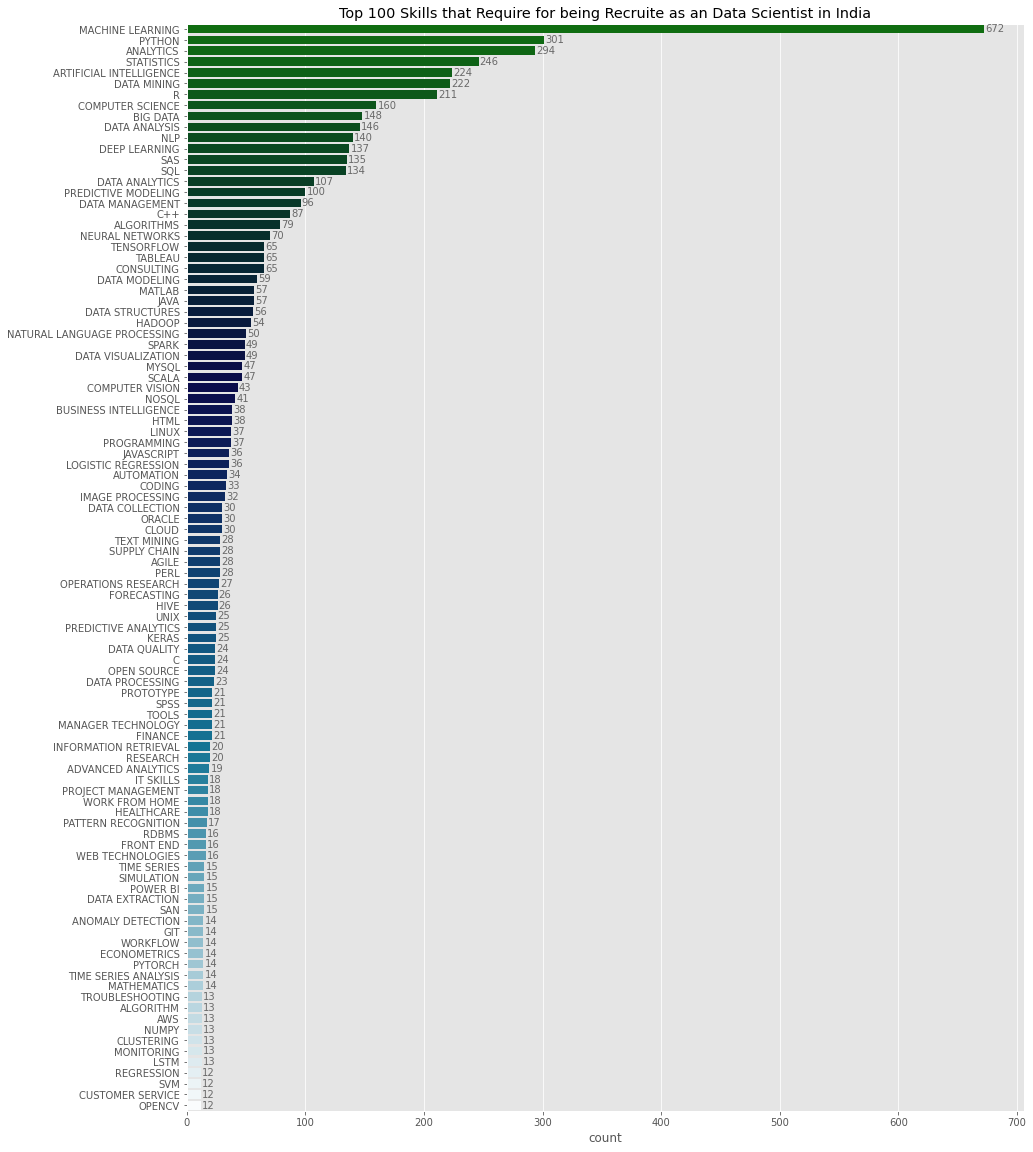

In [17]:
# fix the list
remove_index = []
split_result = []
for i,skill in words.items():
    
    # remove long text
    if len(skill) > 50:
        remove_index.append(i)
        
    # remove DATA SCIENTIST word
    if (skill.find("DATA SCIENTIST") >= 0) or (skill.find("DATA SCINETIST") >= 0) or (skill.find("DATA ANALYST") >= 0):
        remove_index.append(i)
        
    # change AI/ML into ARTIFICIAL INTILLEGENCE and MACHINE LEARNING
    if (skill.find("/") >= 0) and (skill.find("AI") >= 0) and (skill.find("ML") >= 0):
        words[i] = "ARTIFICIAL INTELLIGENCE, MACHINE LEARNING"
        
    # change AI/ML into ARTIFICIAL INTILLEGENCE and MACHINE LEARNING    
    if (skill.find("DECISSION") >= 0) or (skill.find("DECISION TREE") >= 0):
        words[i] = "DECISION TREE"
        
    # merge BIG DATA word
    if (skill.find("BIG") >= 0) and (skill.find("DATA") >= 0):
        words[i] = "BIG DATA"
        
    # merge CLOUD word
    if re.search(r"^CLOUD ",skill):
        words[i] = "CLOUD"
        
    # merge AGILE word
    if re.search(r"^AGILE ",skill):
        words[i] = "AGILE"
        
    # merge SUPPLY CHAIN word
    if skill.find("SUPPLY CHAIN") >= 0:
        words[i] = "SUPPLY CHAIN"
    
    # merge INTERNSHIP word
    if (skill.find("INTERNSHIP") >= 0) or (re.search(r"INTERN",skill)):
        remove_index.append(i)
    
    # merge R word
    if re.search(r"^R ",skill):
        words[i] = "R"
        
    # merge R word
    if re.search(r"^SQL ",skill):
        words[i] = "SQL"
    
    # merge CONSULT word
    if skill.find("CONSULT") >= 0:
        words[i] = "CONSULTING"
        
    # merge FINANC word
    if skill.find("FINANC") >= 0:
        words[i] = "FINANCE"
        
    # merge STATISTICS word
    if "STATISTICAL" in skill.split(" "):
        words[i] = "STATISTICS"
        
    # merge ANALYTICS word
    if ("ANALYTICAL" in skill.split(" ")) or (re.search(r"^ANALYST",skill)):
        words[i] = "ANALYTICS"
        
    # change PYTHON / R into PYTHON, R 
    if ("PYTHON" in skill.split(" ")) and ("R" in skill.split(" ")):
        words[i] = "PYTHON, R"
        
    # merge PYTHON word
    if re.search(r"PYTHON",skill):
        words[i] = "PYTHON"
        
    # change DEEP LEARNING AND ARTIFICIAL INTELLIGENCE into DEEP LEARNING, ARTIFICIAL INTELLIGENCE
    if re.search(r"DEEP LEARNING AND ARTIFICIAL INTELLIGENCE",skill):
        words[i] = words[i].replace(" AND ",", ")
        
    # merge DEEP LEARNING word
    if re.search(r"DEEP LEARNING",skill):
        words[i] = "DEEP LEARNING"
        
    # merge MACHINE LEARNING word
    if "ML" in skill.split(" "):
        words[i] = "MACHINE LEARNING"
    
    # merge MACHINE LEARNING word
    if skill.find("MACHINE LEARNING") >= 0:
        words[i] = "MACHINE LEARNING"
        
    # merge ARTIFICIAL INTELLIGENCE word
    if "AI" in skill.split(" "):
        words[i] = "ARTIFICIAL INTELLIGENCE"
        
    # remove DATA SCIENTIST word
    if skill.find("DATA SCIENCE") >= 0:
        remove_index.append(i)        

    # devide line with coma (,) and make it new row
    if skill.find(", ") >= 0:
        if len(split_result) == 0:
            split_result = skill.split(", ")
        else:
            split_result = np.append(split_result,skill.split(", "))
        remove_index.append(i)
        
# drop some unwanted value
words.drop(remove_index, inplace=True)

# insert splited array
words = pd.Series(np.append(words,split_result))
        
all_skills = words.sort_values().unique()

# plot
fig = plt.figure(figsize=(15,20))
ax = sns.countplot(y=words[words.isin(all_skills)],
                   order=pd.Series(words[words.isin(all_skills)]).value_counts().sort_values(ascending=False).index[:100], palette="ocean")

for x in ax.patches:
    ax.text(x.get_width()+1, x.get_y()+.655, str(x.get_width()), fontsize=10, color='dimgrey')

plt.title(f"Top 100 Skills that Require for being Recruite as an Data Scientist in India")
plt.show()

Machine Learning are the top skills that must be required if you want to be an Data Scientist in India, and of course it could be good if you combine it with other skills too.

## On Experience Variable

Every recruiter in India type the year of experience very differently. But what isteresting me is that they almost looking for candidate with 5-10 or 3-8 years experience as Data Scientist on the field 

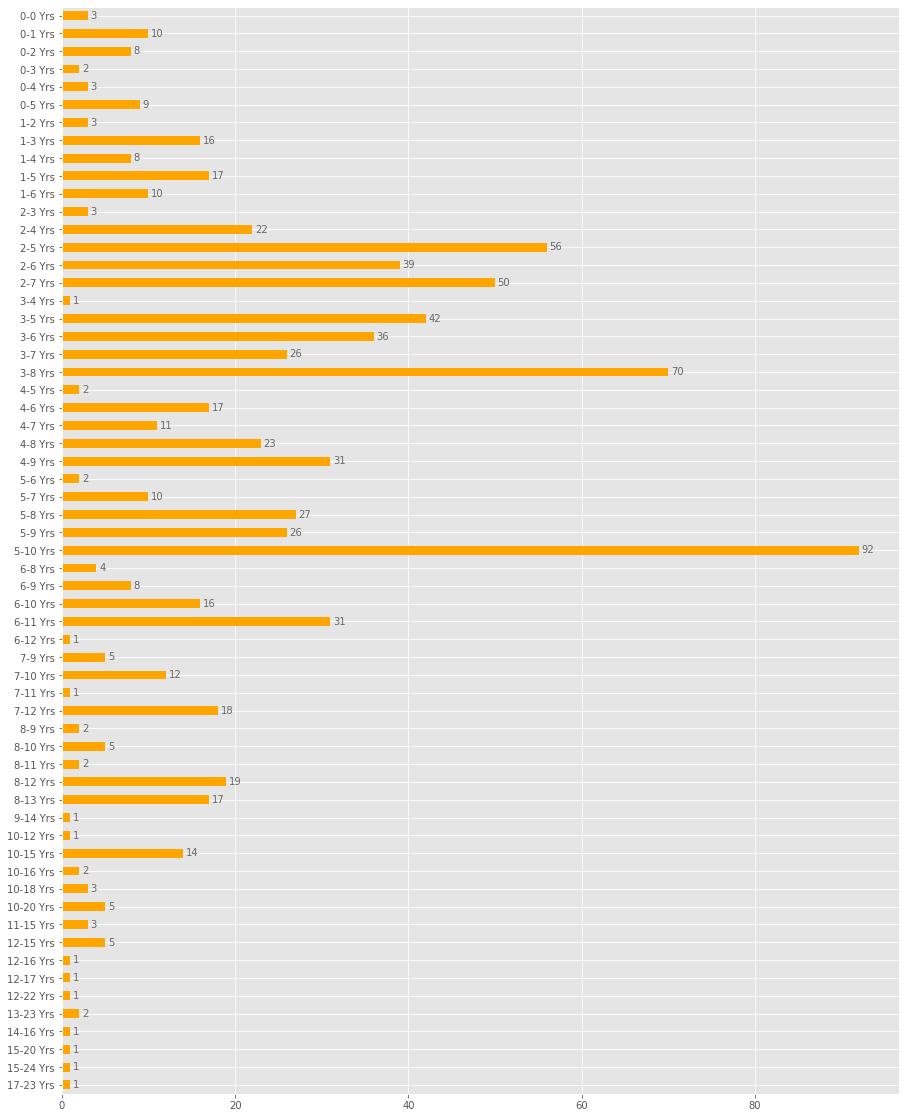

In [18]:
# create new dataframe for experience year
exp = pd.DataFrame(np.sort(df.experience.unique()), columns=['experience'])
exp['start_yr'] = pd.to_numeric(exp.experience.apply(lambda x: re.findall("[0-9]+",x)[0]))
exp['end_yr'] = pd.to_numeric(exp.experience.apply(lambda x: re.findall("[0-9]+",x)[1]))
exp.sort_values(by=['start_yr','end_yr'], inplace=True)

# plot the data and sort it by the experience
values = df.experience.value_counts().loc[exp.experience.unique()]
ax = values.plot.barh(color="orange", figsize=(15,20))

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.4, str(i.get_width()), fontsize=10, color='dimgrey')

ax.invert_yaxis()
plt.show()

In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[30,30])
plt.imshow(interpolation="bilinear" , X=wc)
plt.axis('off')
plt.show()

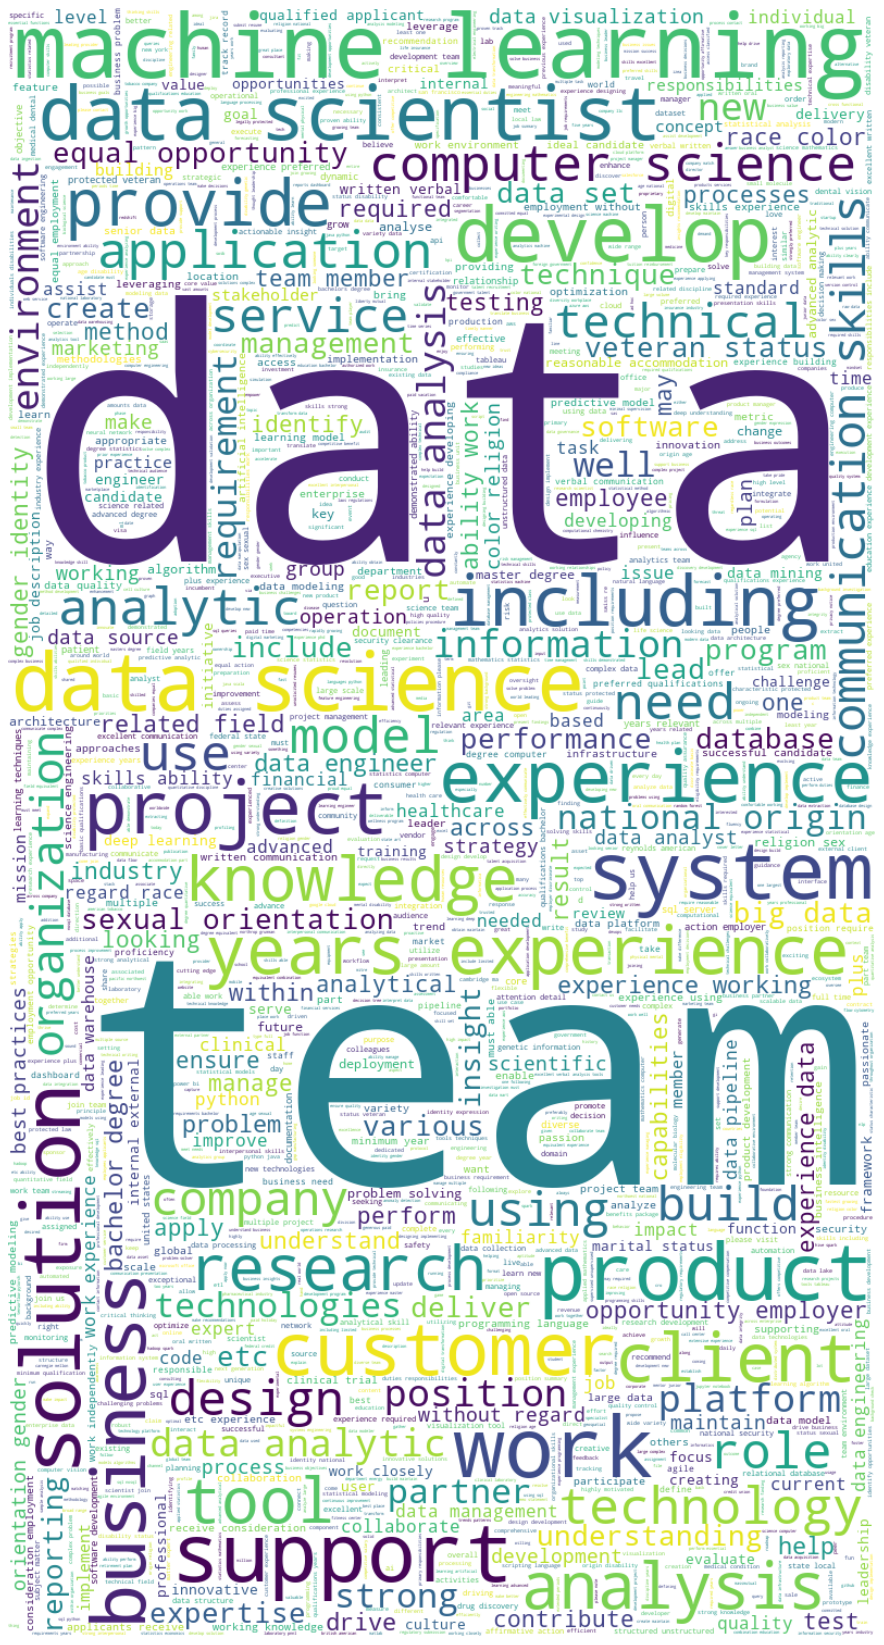

## Conclusion:

#### Now I am sure you might have got some idea about the data science job market in India and what are recruiters demading from you. You do not require all the skills mentioned here though. 

